### Basis of the Automation of Solar Panel

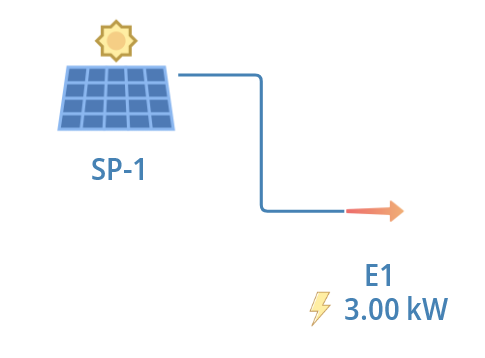

In [32]:
# Import the display function from the IPython.display module
from IPython.display import display

# Import the Image class from the PIL module
from PIL import Image

# Open an image file using the Image class and assign it to the variable Basis_image
Basis_image = Image.open(r"D:\08 Linked In\05 Github\DWSim-Automation-Repo\06 Automation of Solar Panel\Solar Panel Basis.PNG")

# Display the Basis_image using the display function from IPython.display
display(Basis_image)

In [33]:
# Import the clr module, which provides the .NET Common Language Runtime (CLR) functionality for Python
import clr

# Import the System.IO module, which provides access to the input/output (I/O) operations on files and directories
import System.IO

# Import the System module, which provides access to common types and functionality in the .NET framework
import System

# Import the pythoncom module, which provides Python bindings for COM (Component Object Model) services
import pythoncom

# Import the Directory, Path, and File classes from the System.IO module, which provide methods for working with directories and files
from System.IO import Directory, Path, File

# Import the String and Environment classes from the System module, which provide methods for working with strings and environment variables
from System import String, Environment

# Initialize the COM components
pythoncom.CoInitialize()

# Set the path to the DWSIM installation folder
dwSimPath = r"C:\Users\viraj\AppData\Local\DWSIM\\"

# Add references to the DWSIM libraries using the clr module
# The AddReference method is used to add a reference to a .NET assembly
# The path to the assembly is constructed using the dwSimPath variable and the name of the assembly file
# Each assembly provides a specific set of functionality for DWSIM
clr.AddReference(dwSimPath + "CapeOpen.dll")
clr.AddReference(dwSimPath + "DWSIM.Automation.dll")
clr.AddReference(dwSimPath + "DWSIM.Interfaces.dll")
clr.AddReference(dwSimPath + "DWSIM.GlobalSettings.dll")
clr.AddReference(dwSimPath + "DWSIM.SharedClasses.dll")
clr.AddReference(dwSimPath + "DWSIM.Thermodynamics.dll")
clr.AddReference(dwSimPath + "DWSIM.UnitOperations.dll")
clr.AddReference(dwSimPath + "DWSIM.Inspector.dll")
clr.AddReference(dwSimPath + "System.Buffers.dll")

# Import specific classes from the DWSIM libraries using the "from...import" syntax
# The classes are used in the subsequent code to access specific functionality provided by DWSIM
from DWSIM.Interfaces.Enums.GraphicObjects import ObjectType
from DWSIM.Thermodynamics import Streams, PropertyPackages
from DWSIM.UnitOperations import UnitOperations
from DWSIM.Automation import Automation3
from DWSIM.GlobalSettings import Settings

# Set the current directory to the DWSIM installation folder using the Directory class from the System.IO module
# This is necessary so that the DWSIM libraries can be located and imported correctly
Directory.SetCurrentDirectory(dwSimPath)

In [34]:
# Create an instance of the Automation3 class from the DWSIM.Automation module
# This class provides methods for automating tasks in DWSIM, such as creating and manipulating flowsheets
interf = Automation3()

In [35]:
# Set the file path of an existing DWSIM flowsheet to be loaded using the Path.Combine method from the System.IO module
# The flowsheet file path is constructed using the Environment.GetFolderPath method to obtain the path to the desktop folder and the relative path to the flowsheet file
fileNameToLoad = Path.Combine(Environment.GetFolderPath(Environment.SpecialFolder.Desktop), r"D:\08 Linked In\05 Github\DWSim-Automation-Repo\06 Automation of Solar Panel\06 Automation of Solar Panel.dwxmz")

# Load the DWSIM flowsheet using the LoadFlowsheet method of the Automation3 class
# The method takes a single argument, which is the file path of the flowsheet to be loaded
# The method returns a Simulation object that represents the loaded flowsheet
sim = interf.LoadFlowsheet(fileNameToLoad)

### Calling Solar Panel as a object

In [36]:
SP_1 = sim.GetObject("SP-1")
SP_1 = SP_1.GetAsObject()

### Getting the calculation parameters

In [37]:
print(SP_1.get_SolarIrradiation_kW_m2())
print(SP_1.get_NumberOfPanels())
print(SP_1.get_PanelArea())
print(SP_1.get_PanelEfficiency())

1.0
6
0.5
100.0


### Getting the Results

In [38]:
SP_1.GetPowerGeneratedOrConsumed()

3.0

### Location
latitude = 22.2937572,

longitude = 73.2259962

In [39]:
from pysolar.solar import *
import datetime

latitude = 22.2937572
longitude = 73.22559962

date = datetime.datetime.now(datetime.timezone.utc)
print(get_altitude(latitude, longitude, date))
altitude_deg = get_altitude(latitude, longitude, date)
solar_radiation = radiation.get_radiation_direct(date, altitude_deg)/1000 # gets the solar radidiation for the current time and location
solar_radiation

40.800843913563824


c:\Users\viraj\AppData\Local\Programs\Python\Python311\Lib\site-packages\pysolar\solartime.py:113: UserWarning: I don't know about leap seconds after 2023
  warnings.warn \


0.8533197800586636

In [41]:
SP_1.set_SolarIrradiation_kW_m2(solar_radiation)
Settings.SolverMode = 0
SP_1.GetPowerGeneratedOrConsumed()
SP_1.get_SolarIrradiation_kW_m2()

0.8533197800586636

In [8]:
from tabulate import tabulate

# Set the initial static head
Static_head = float(input("Enter the initial static head: "))

# Set the solver mode to use the default solver
Settings.SolverMode = 0

# Create an empty list to store the results
results = []

# Iterate 10 times, increasing the static head by 1 m each time
for i in range(10):
    # Set the new static head
    HT.set_StaticHead(Static_head)
    
    # Calculate the flowsheet
    errors = interf.CalculateFlowsheet2(sim)
    
    # Get the results
    Velocity_head = HT.get_VelocityHead()
    Total_Head = HT.get_TotalHead()
    Power = HT.get_GeneratedPower()

    # Append the results to the list
    results.append([Static_head, Velocity_head, Total_Head, Power])

    # Increase the static head by 1 m for the next iteration
    Static_head += 1.0

# Define the headers for the table
headers = ["Static head", "Velocity head", "Total head", "Power Generated"]

# Print the results in a table format
print(tabulate(results, headers=headers, tablefmt="grid"))


+---------------+-----------------+--------------+-------------------+
|   Static head |   Velocity head |   Total head |   Power Generated |
+===============+=================+==============+===================+
|             1 |       0.0382653 |      1.03827 |           7.60872 |
+---------------+-----------------+--------------+-------------------+
|             2 |       0.0382653 |      2.03827 |          14.937   |
+---------------+-----------------+--------------+-------------------+
|             3 |       0.0382653 |      3.03827 |          22.2653  |
+---------------+-----------------+--------------+-------------------+
|             4 |       0.0382653 |      4.03827 |          29.5936  |
+---------------+-----------------+--------------+-------------------+
|             5 |       0.0382653 |      5.03827 |          36.9219  |
+---------------+-----------------+--------------+-------------------+
|             6 |       0.0382653 |      6.03827 |          44.2502  |
+-----

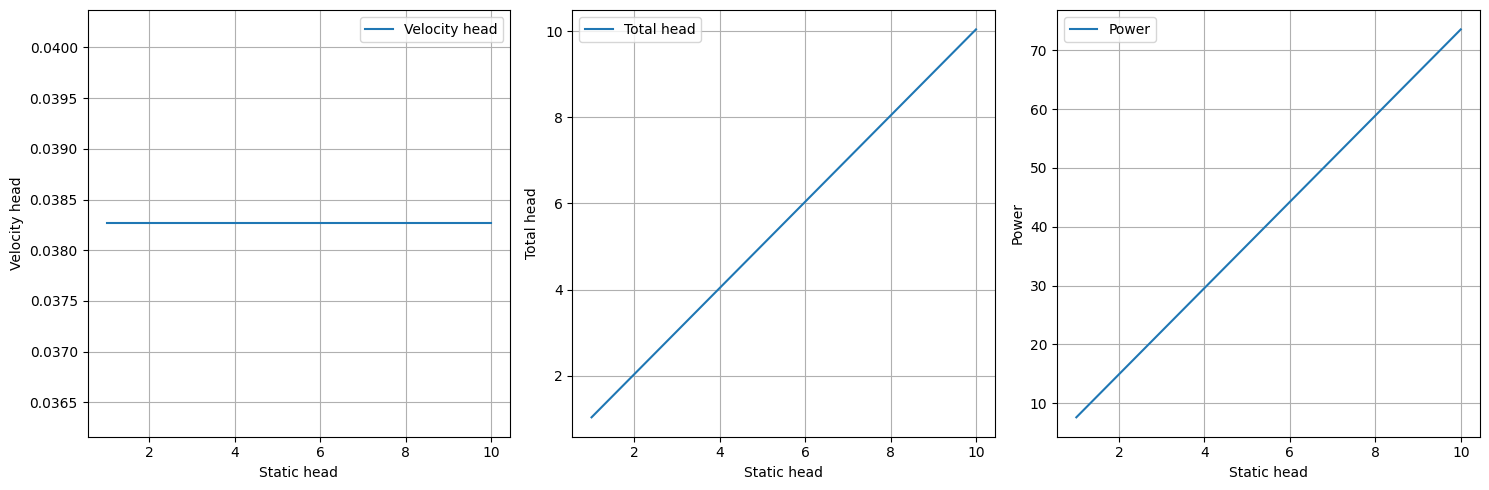

In [9]:
import matplotlib.pyplot as plt

# Extract the data from the results list
Static_head = [row[0] for row in results]
Velocity_head = [row[1] for row in results]
Total_Head = [row[2] for row in results]
Power = [row[3] for row in results]

# Plotting the results
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].plot(Static_head, Velocity_head, label='Velocity head')
axs[0].set_xlabel('Static head')
axs[0].set_ylabel('Velocity head')
axs[0].legend()
axs[0].grid()

axs[1].plot(Static_head, Total_Head, label='Total head')
axs[1].set_xlabel('Static head')
axs[1].set_ylabel('Total head')
axs[1].legend()
axs[1].grid()

axs[2].plot(Static_head, Power, label='Power')
axs[2].set_xlabel('Static head')
axs[2].set_ylabel('Power')
axs[2].legend()
axs[2].grid()

plt.tight_layout()
plt.show()

### Automation of Hydroelectric Turbines for a range of inlet velocity

In [10]:
from tabulate import tabulate

# Set the initial inlet velocity
Inlet_Velocity = float(input("Enter the initial inlet velocity: "))
HT.set_StaticHead(1) # Setting to default of 1 m of static head.

# Set the solver mode to use the default solver
Settings.SolverMode = 0

# Create an empty list to store the results
results = []

# Iterate 10 times, increasing the inlet velocity by 1 m/s each time
for i in range(10):
    # Set the new inlet velocity
    HT.set_InletVelocity(Inlet_Velocity)
    
    # Calculate the flowsheet
    errors = interf.CalculateFlowsheet2(sim)
    
    # Get the results
    Velocity_head = HT.get_VelocityHead()
    Total_Head = HT.get_TotalHead()
    Power = HT.get_GeneratedPower()

    # Append the results to the list
    results.append([Inlet_Velocity, Velocity_head, Total_Head, Power])

    # Increase the inlet velocity by 1 m/s for the next iteration
    Inlet_Velocity += 1.0

# Define the headers for the table
headers = ["Inlet Veloicty", "Velocity head", "Total head", "Power Generated"]

# Print the results in a table format
print(tabulate(results, headers=headers, tablefmt="grid"))


+------------------+-----------------+--------------+-------------------+
|   Inlet Veloicty |   Velocity head |   Total head |   Power Generated |
+==================+=================+==============+===================+
|                1 |       0.0382653 |      1.03827 |           7.60872 |
+------------------+-----------------+--------------+-------------------+
|                2 |       0.191327  |      1.19133 |           8.7304  |
+------------------+-----------------+--------------+-------------------+
|                3 |       0.446429  |      1.44643 |          10.5999  |
+------------------+-----------------+--------------+-------------------+
|                4 |       0.803571  |      1.80357 |          13.2171  |
+------------------+-----------------+--------------+-------------------+
|                5 |       1.26276   |      2.26276 |          16.5822  |
+------------------+-----------------+--------------+-------------------+
|                6 |       1.82398   |

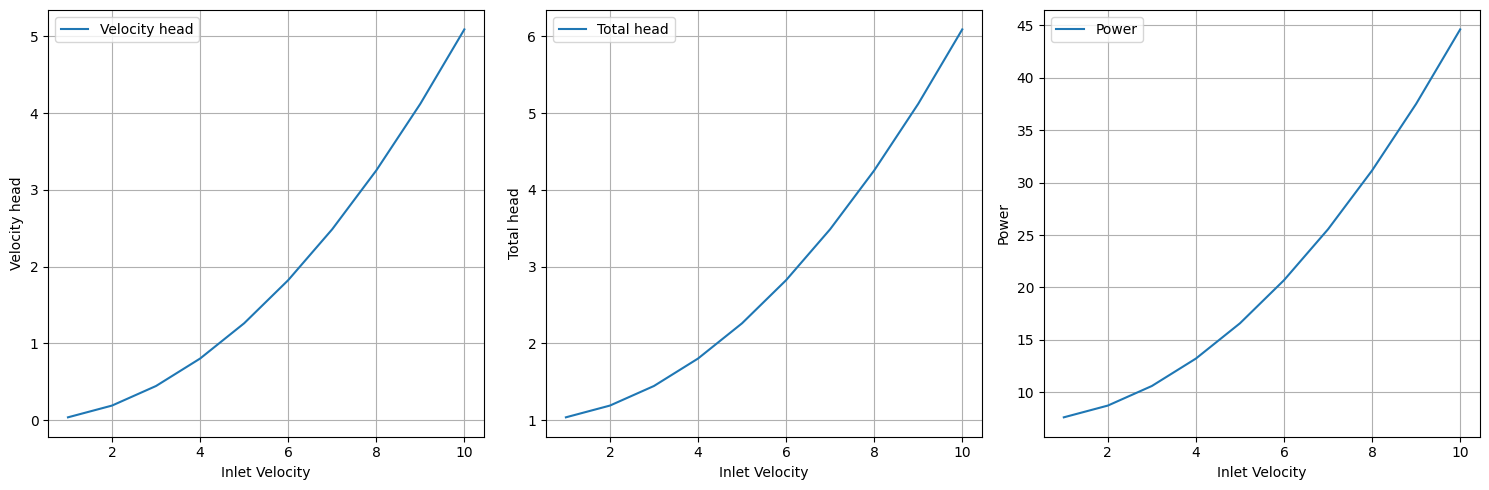

In [41]:
import matplotlib.pyplot as plt

# Extract the data from the results list
Inlet_Velocity = [row[0] for row in results]
Velocity_head = [row[1] for row in results]
Total_Head = [row[2] for row in results]
Power = [row[3] for row in results]

# Plotting the results
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

axs[0].plot(Inlet_Velocity, Velocity_head, label='Velocity head')
axs[0].set_xlabel('Inlet Velocity')
axs[0].set_ylabel('Velocity head')
axs[0].legend()
axs[0].grid()

axs[1].plot(Inlet_Velocity, Total_Head, label='Total head')
axs[1].set_xlabel('Inlet Velocity')
axs[1].set_ylabel('Total head')
axs[1].legend()
axs[1].grid()

axs[2].plot(Inlet_Velocity, Power, label='Power')
axs[2].set_xlabel('Inlet Velocity')
axs[2].set_ylabel('Power')
axs[2].legend()
axs[2].grid()

plt.tight_layout()
plt.show()

### Saving the file

In [11]:
# saving the modified version of file at same path

fileNameToSave = Path.Combine(Environment.GetFolderPath(Environment.SpecialFolder.Desktop), r"D:\08 Linked In\05 Github\DWSim-Automation-Repo\05 Automation of Hydroelectric Turbines\00 Modified_flowsheet.dwxmz")

interf.SaveFlowsheet(sim, fileNameToSave, True)

#### Disclamer

The exercise done was to understand how automation can be used for Hydroelectric Turbines in DWSim. It does not contains any process data from a live plant under operating conditions but yes the same can be replicated if customer data is available